In [1]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d nafishamoin/new-bangladeshi-crop-disease

new-bangladeshi-crop-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# unzip the file 
import zipfile
zip_ref = zipfile.ZipFile('/content/new-bangladeshi-crop-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
!ls

BangladeshiCrops  Invalid      new-bangladeshi-crop-disease.zip
Info.txt	  kaggle.json  sample_data


In [4]:
#import all the necessary libraries
import os # for accessing the files 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # visualize and process the image
import cv2 # open cv
from google.colab.patches import cv2_imshow # per cell e img show korar jnno within this window
from PIL import Image #read images and do some processes on it 
from sklearn.model_selection import train_test_split
import seaborn as sns
from glob import glob
import pandas as pd
import keras

In [5]:
# dataset_path = "/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Corn"

# images = []
# labels = []
# counter = 1
# for label in os.listdir(dataset_path):
#     label_path = os.path.join(dataset_path, label)

#     for image_name in os.listdir(label_path):
#         image_path = os.path.join(label_path, image_name)
#         image = cv2.imread(image_path)
#         #image = cv2.resize(image,(256,256),interpolation=cv2.INTER_LINEAR)
#         images.append(image)
#         labels.append(label)
#         cv2_imshow(images)
#         if counter <= 3:
#           break

In [6]:
# print("total images ",len(images))
# print("total label ",len(labels))

In [7]:
# x = np.array(images)
# y = np.array(labels)
# print("type of x ",type(x))
# print("type of y ",type(y))

In [8]:
# plt.imshow(x[1100])
# plt.title(y[1100])

In [6]:
x = []
y = []

image_size = 224

labels = ['Corn___Common_Rust','Corn___Gray_Leaf_Spot','Corn___Healthy','Corn___Northern_Leaf_Blight']
counter = 1
for i in labels:
   folderPath = os.path.join('/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Corn',i)
   for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        y.append(i)


In [7]:
print('type, lenght, shape of the x',type(x),len(x),x[0].shape)
print('type, lenght, shape of the y',type(y),len(y),y)

type, lenght, shape of the x <class 'list'> 3852 (224, 224, 3)
type, lenght, shape of the y <class 'list'> 3852 ['Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn___Common_Rust', 'Corn__

In [8]:
x = np.array(x)
y = np.array(y)
print("type of x ",type(x))
print("type of y ",type(y))

type of x  <class 'numpy.ndarray'>
type of y  <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Corn___Common_Rust')

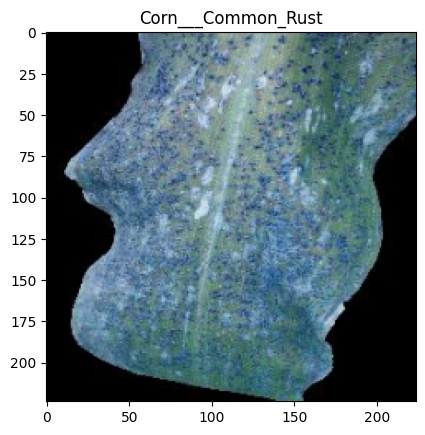

In [9]:
plt.imshow(x[1])
plt.title(y[0])

In [13]:
# from keras.utils import to_categorical
# num_classes = len(np.unique(y))
# print('unique class of y',num_classes)
# # Convert the labels to categorical format
# y = to_categorical(y,num_classes=num_classes)
# y.shape

In [10]:
import numpy as np
from keras.utils import to_categorical

# Assuming you have the labels stored in a NumPy array 'y'

# Create a dictionary to map label strings to integer values
label_mapping = {
    'Corn___Common_Rust': 0,
    'Corn___Gray_Leaf_Spot': 1,
    'Corn___Healthy': 2,
    'Corn___Northern_Leaf_Blight': 3
}

# Map the label strings to integer values
y_mapped = np.array([label_mapping[label] for label in y])

# Get the number of classes
num_classes = len(label_mapping)

# Convert the labels to categorical format
y_categorical = to_categorical(y_mapped, num_classes=num_classes)

# Print the shape of the categorical labels
print('Shape of y_categorical:', y_categorical.shape)

Shape of y_categorical: (3852, 4)


In [15]:
x= x/255.0


In [11]:
y = y_categorical
# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 101)

In [12]:
print("x shape ",x.shape)
print("x_train shape ",x_train.shape)
print("x_test shape ",x_test.shape)

x shape  (3852, 224, 224, 3)
x_train shape  (3466, 224, 224, 3)
x_test shape  (386, 224, 224, 3)


In [13]:

print('y shape ',y.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

y shape  (3852, 4)
y_train shape  (3466, 4)
y_test shape  (386, 4)


**Build the CNN model_1**

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import  RMSprop


# Define a sequential model
model = Sequential()

# Add convolutional layer with 32 filters, kernel size of (3,3), ReLU activation, and input shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
# Add max pooling layer with pool size of (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))                                                                                   # CONV BLOCK 1
# Add batch normalization layer
model.add(BatchNormalization())

# Add convolutional layer with 32 filters, kernel size of (3,3), ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))
# Add max pooling layer with pool size of (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add batch normalization layer                                                                                               # CONV BLOCK 2
model.add(BatchNormalization())
# Add dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add convolutional layer with 64 filters, kernel size of (3,3), ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# Add batch normalization layer
model.add(BatchNormalization())
# Add max pooling layer with pool size of (2,2)                                                                              # CONV BLOCK 3
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add flatten layer
model.add(Flatten())

# Add dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Add dropout layer with a rate of 0.5
model.add(Dropout(0.5))                                                                                                     # CLASSIFICATION HEAD
# Add dense layer with 2 units and softmax activation
model.add(Dense(4, activation='softmax')) 

# Define optimizer as RMSprop with learning rate of 0.0001
optimizer = RMSprop(learning_rate=0.0001)

# Compile model with categorical crossentropy loss and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                        

In [15]:
history=model.fit(x_train,y_train,epochs = 20,validation_split =0.1)

Epoch 1/20
98/98 [==============================] - 22s 84ms/step - loss: 0.6879 - accuracy: 0.8076 - val_loss: 2.0025 - val_accuracy: 0.6657
Epoch 2/20
98/98 [==============================] - 7s 75ms/step - loss: 0.3052 - accuracy: 0.8788 - val_loss: 0.3586 - val_accuracy: 0.8790
Epoch 3/20
98/98 [==============================] - 7s 74ms/step - loss: 0.2597 - accuracy: 0.8894 - val_loss: 0.4510 - val_accuracy: 0.8847
Epoch 4/20
98/98 [==============================] - 7s 75ms/step - loss: 0.2106 - accuracy: 0.9192 - val_loss: 0.4896 - val_accuracy: 0.8847
Epoch 5/20
98/98 [==============================] - 7s 75ms/step - loss: 0.2063 - accuracy: 0.9247 - val_loss: 0.3023 - val_accuracy: 0.8963
Epoch 6/20
98/98 [==============================] - 7s 75ms/step - loss: 0.1738 - accuracy: 0.9314 - val_loss: 0.3852 - val_accuracy: 0.9020
Epoch 7/20
98/98 [==============================] - 7s 75ms/step - loss: 0.1557 - accuracy: 0.9413 - val_loss: 0.3005 - val_accuracy: 0.8934
Epoch 8/20
9

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)
print('Loss =', loss)

13/13 [==============================] - 0s 25ms/step - loss: 0.2403 - accuracy: 0.9378
Test Accuracy = 0.9378238320350647
Loss = 0.24031442403793335


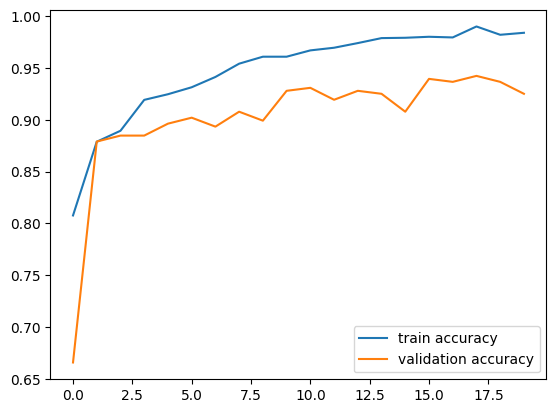

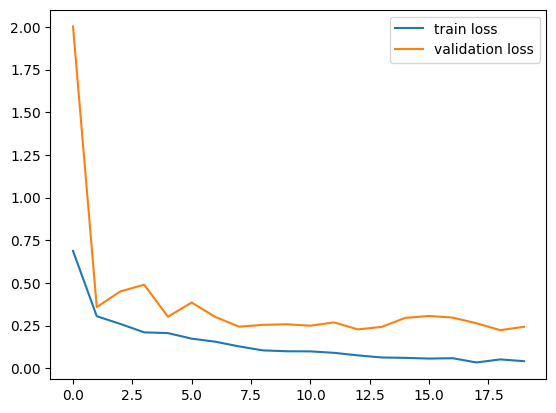

In [17]:
h = history
#plot the accuracy value 
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()

#plot the loss value 
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

Path of the image to be predicted: /content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Corn/Corn___Northern_Leaf_Blight/image (153).JPG


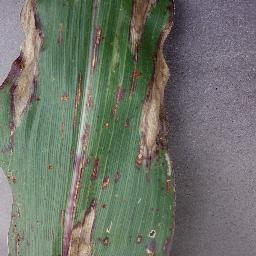

1/1 [==============================] - 0s 18ms/step
Probability of Corn___Common_Rust,Corn___Gray_Leaf_Spot,Corn___Healthy,Corn___Northern_Leaf_Blight
[[2.0038038e-09 2.0522065e-04 4.7668442e-11 9.9979478e-01]]
3
Corn___Northern_Leaf_Blight


In [33]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224,224))

#input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_resized, [1,224,224,3])

input_prediction = model.predict(input_image_reshaped)

print("Probability of Corn___Common_Rust,Corn___Gray_Leaf_Spot,Corn___Healthy,Corn___Northern_Leaf_Blight")
print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('Corn___Common_Rust')

elif input_pred_label ==1:

  print('Corn___Gray_Leaf_Spot')
elif input_pred_label ==2:

  print('Corn___Healthy')

elif input_pred_label ==3:

  print('Corn___Northern_Leaf_Blight')

In [34]:
model.save('/content/drive/MyDrive/Deep learning Save model/Corn_diseases_detection.h5')

In [20]:


# labels = ['Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Corn___Northern_Leaf_Blight']
# image_folder = '/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Corn/Corn___Common_Rust'  # Replace with the actual path to your image folder
# target_size = (224, 224)

# images = []
# labels = []
# counter = 1
# for label in labels:
#     image_path = f"{image_folder}/{label}.jpg"  # Assuming the image filenames follow the label names with '.jpg' extension

#     # Read the image
#     image = cv2.imread(image_path)

#     # Resize the image
#     resized_image = cv2.resize(image, target_size)

#     images.append(resized_image)
#     labels.append(label)

#     cv2_imshow(label, resized_image)

#     if counter <=1:
#       break

# images = np.array(images)
# labels = np.array(labels)

In [ ]:
len(images)